# Contextual search

In [ ]:
%%capture
!pip install torchvision ipyplot git+https://github.com/neuml/txtai#egg=txtai[similarity]

# Get test data
!wget -N https://github.com/neuml/txtai/releases/download/v3.5.0/tests.tar.gz
!tar -xvzf tests.tar.gz

In [ ]:
import pandas as pd

In [ ]:
data = "."
df = pd.read_json(data)

In [ ]:
df.sample(10)

,name,description,brand,categories,hierarchicalCategories,type,price,price_range,image,url,free_shipping,rating,popularity,objectID
1828,"Klipsch - Reference Dual 8"" Floorstanding Spea...","Utilizing dual 8"" copper-spun IMG woofers and ...",Klipsch,"[Audio, Home Audio, Speakers, Floor Speakers]","{'lvl0': 'Audio', 'lvl1': 'Audio > Home Audio'...",Floor speakers,449.99,200 - 500,https://cdn-demo.algolia.com/bestbuy-0118/6228...,https://api.bestbuy.com/click/-/6228118/pdp,True,4,19641,6228118
15184,BISSELL - MultiSurface Floor Cleaning Formula ...,Remove dirt and grime from floors in one clean...,BISSELL,"[Appliances, Cleaning Solutions]","{'lvl0': 'Appliances', 'lvl1': 'Appliances > C...",Chemicals,9.99,1 - 50,https://cdn-demo.algolia.com/bestbuy-0118/5618...,https://api.bestbuy.com/click/-/5618011/pdp,True,5,6285,5618011
16096,Apple - Sport Band for Apple Watch 38mm - Cocoa,"Made from high-performance fluoroelastomer,the...",Apple,"[Wearable Technology, Apple Watch, Apple Watch...","{'lvl0': 'Wearable Technology', 'lvl1': 'Weara...",Apple first party,49.00,1 - 50,https://cdn-demo.algolia.com/bestbuy-0118/5531...,https://api.bestbuy.com/click/-/5531300/pdp,True,4,5373,5531300
11443,Whirlpool - Duet 7.4 Cu. Ft. 7-Cycle Gas Dryer...,Efficiently remove moisture from a variety of ...,Whirlpool,"[Appliances, Washers & Dryers, Dryers, Gas Dry...","{'lvl0': 'Appliances', 'lvl1': 'Appliances > W...",,899.99,500 - 2000,https://cdn-demo.algolia.com/bestbuy-0118/8784...,https://api.bestbuy.com/click/-/8784431/pdp,False,0,10026,8784431
12846,Insignia™ - Apple MFi Certified FM Transmitter...,Connect this Insignia&#8482; NS-MA5FMT FM tran...,Insignia™,"[Audio, FM Transmitters]","{'lvl0': 'Audio', 'lvl1': 'Audio > FM Transmit...",Connectivity,39.99,1 - 50,https://cdn-demo.algolia.com/bestbuy-0118/6562...,https://api.bestbuy.com/click/-/6562101/pdp,True,3,8623,6562101
3466,Brother - TN330 Toner Cartridge - Black,Replace your depleted toner cartridge with thi...,Brother,"[Office & School Supplies, Printer Ink & Toner...","{'lvl0': 'Office & School Supplies', 'lvl1': '...",Toners,57.49,50 - 100,https://cdn-demo.algolia.com/bestbuy-0118/8668...,https://api.bestbuy.com/click/-/8668783/pdp,True,4,18003,8668783
8365,"Visual Land - Prestige Elite 10QL - 10.1"" - Ta...","Visual Land Prestige Elite 10QL Tablet: Work, ...",Visual Land,"[Computers & Tablets, Tablets, All Tablets]","{'lvl0': 'Computers & Tablets', 'lvl1': 'Compu...",,94.99,50 - 100,https://cdn-demo.algolia.com/bestbuy-0118/4588...,https://api.bestbuy.com/click/-/4588200/pdp,True,3,13104,4588200
5445,LG - 20.2 Cu. Ft. Top-Freezer Refrigerator - S...,This LG LTCS20220W top-freezer refrigerator fe...,LG,"[Appliances, Refrigerators, All Refrigerators]","{'lvl0': 'Appliances', 'lvl1': 'Appliances > R...",,854.99,500 - 2000,https://cdn-demo.algolia.com/bestbuy-0118/7465...,https://api.bestbuy.com/click/-/7465127/pdp,False,4,16024,7465127
10069,"GE - Profile 36"" Built-in Gas Cooktop - Stainl...",Cooking large meals at once is what this cookt...,GE,"[Appliances, Ranges, Cooktops & Ovens, Cooktops]","{'lvl0': 'Appliances', 'lvl1': 'Appliances > R...",,1169.99,500 - 2000,https://cdn-demo.algolia.com/bestbuy-0118/7176...,https://api.bestbuy.com/click/-/7176753/pdp,False,3,11400,7176753
2098,Mattel - Minecraft 5-inch Figure - Multi,Let this Minecraft Exploding Creeper action fi...,Mattel,"[Video Games, Minecraft Collectibles]","{'lvl0': 'Video Games', 'lvl1': 'Video Games >...",Vg toys,12.99,1 - 50,https://cdn-demo.algolia.com/bestbuy-0118/5337...,https://api.bestbuy.com/click/-/5337000/pdp,True,4,19371,5337000


In [ ]:
df.shape

(21469, 14)

# EDA

In [ ]:
df["brand"].value_counts()

Insignia™                746
Samsung                  633
Metra                    587
HP                       530
Apple                    442
                        ... 
RPS                        1
Sound World Solutions      1
Juicy Couture              1
Engino                     1
Bern                       1
Name: brand, Length: 1571, dtype: int64

# Price Distribution

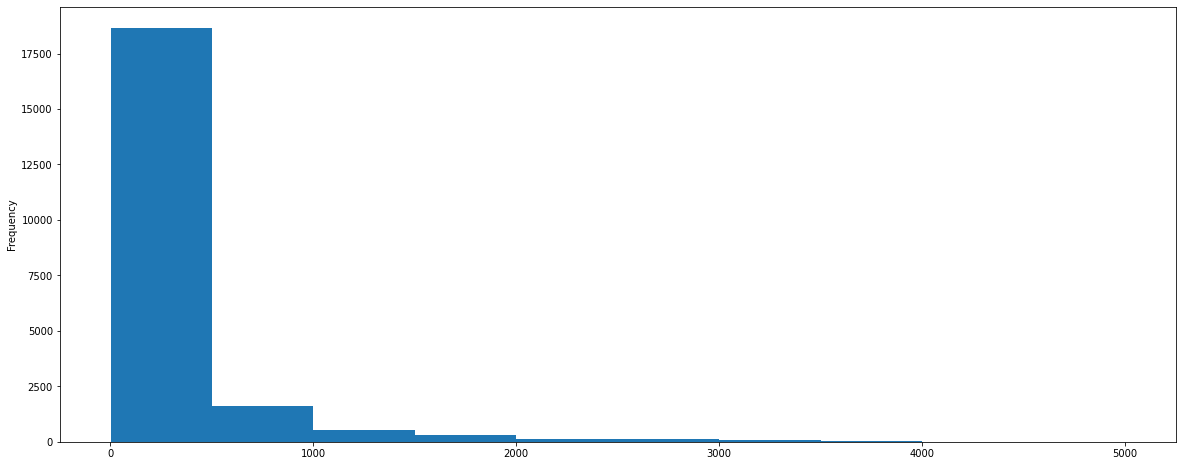

In [ ]:
df["price"].plot(kind="hist",figsize=(20,8))

# Top Brand with price Values

In [ ]:
df.groupby(["brand","price"]).sum().sort_values("popularity",ascending=False).head(30)

free_shipping  rating  popularity    objectID
brand          price                                                
Metra          16.99             330    1128     1293870  1717165876
Insignia™      19.99             105     430     1174596   611391749
               14.99             106     423      966591   596823097
               29.99              64     255      678735   360165645
               9.99               48     214      482927   307512026
               39.99              32     127      467725   177502684
               12.99              58     236      461680   298283612
Apple          699.99             23      96      436704   134895308
Insignia™      24.99              44     178      433119   237692179
Nintendo       12.99              21      90      415758   117810734
Keurig         12.99              23      92      407116   126210500
Platinum       39.99              58     226      404586   316077898
Best Buy GC    15.00              24     108      398609   142390261
Modal          19.99              51     212      365271   300645600
Insignia™      49.99              24     103      351914   128373076
Apple          499.99             16      82      334091   101451273
GE             539.99              0      81      319248   102266522
Hamilton Beach 49.99              22      88      310914   119781295
               39.99              23      79      302905   129323736
Samsung        349.99             17      64      299479    92615840
Apple          799.99             15      60      298608    83713484
Crane          49.99              17      70      297334    82875718
Insignia™      7.99               32     128      293853   208518425
Cuisinart      99.99              19      64      293802   131029504
Hamilton Beach 34.99              19      75      293647   125588212
OtterBox       49.99              40     193      293475   240347464
Metra          49.99             108     306      288698   441454230
Speck          39.99              45     201      280251   300645732
Samsung        249.99             14      55      277072    81731063
Epson          12.99              15      59      274217    92379774

# Lects check Images 

In [ ]:
!pip install ipyplot

In [ ]:
import ipyplot
from PIL import Image

In [ ]:
df["image"][0]

'https://cdn-demo.algolia.com/bestbuy-0118/5477500_sb.jpg'

In [ ]:
!wget https://cdn-demo.algolia.com/bestbuy-0118/5477500_sb.jpg

--2022-05-01 17:45:21--  https://cdn-demo.algolia.com/bestbuy-0118/5477500_sb.jpg
Resolving cdn-demo.algolia.com (cdn-demo.algolia.com)... 104.16.46.55, 104.16.45.55
Connecting to cdn-demo.algolia.com (cdn-demo.algolia.com)|104.16.46.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12538 (12K) [image/jpeg]
Saving to: ‘5477500_sb.jpg’

5477500_sb.jpg      100%[===================>]  12.24K  --.-KB/s    in 0s      

2022-05-01 17:45:21 (56.8 MB/s) - ‘5477500_sb.jpg’ saved [12538/12538]



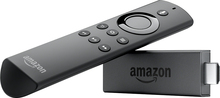

In [ ]:
from IPython.display import Image
Image('/content/5477500_sb.jpg')

# NLP

In [ ]:
%%capture

from txtai.embeddings import Embeddings

# Create embeddings model, backed by sentence-transformers & transformers
embeddings = Embeddings({"path": "sentence-transformers/nli-mpnet-base-v2"})

In [ ]:
df.sample(5)

,name,description,brand,categories,hierarchicalCategories,type,price,price_range,image,url,free_shipping,rating,popularity,objectID
7082,"GE - 24"" Built-In Double Electric Wall Oven - ...",Cook for the whole family with this double ove...,GE,"[Appliances, Ranges, Cooktops & Ovens, Wall Ov...","{'lvl0': 'Appliances', 'lvl1': 'Appliances > R...",,1484.99,500 - 2000,https://cdn-demo.algolia.com/bestbuy-0118/6348...,https://api.bestbuy.com/click/-/6348561/pdp,False,2,14387,6348561
3547,Sony - Xperia X 4G LTE with 32GB Memory Cell P...,Bring console games to your pocket with this S...,Sony,"[Cell Phones, Unlocked Cell Phones, All Unlock...","{'lvl0': 'Cell Phones', 'lvl1': 'Cell Phones >...",Unlocked handsets,399.99,200 - 500,https://cdn-demo.algolia.com/bestbuy-0118/5336...,https://api.bestbuy.com/click/-/5336917/pdp,True,3,17922,5336917
1028,Motorola - Moto Z Play 4G LTE with 32GB Memory...,Call friends and family on this Moto Z smartph...,Motorola,"[Cell Phones, Unlocked Cell Phones, All Unlock...","{'lvl0': 'Cell Phones', 'lvl1': 'Cell Phones >...",Unlocked handsets,449.99,200 - 500,https://cdn-demo.algolia.com/bestbuy-0118/5601...,https://api.bestbuy.com/click/-/5601604/pdp,True,4,20441,5601604
5685,Shop-Vac - 5 Gallon Stainless Steel Wet/Dry Va...,Shop-Vac 5 gallon 4.5 peak HP stainless steel ...,Shop-Vac,[Appliances],{'lvl0': 'Appliances'},,69.99,50 - 100,https://cdn-demo.algolia.com/bestbuy-0118/4472...,https://api.bestbuy.com/click/-/4472168/pdp,True,4,15784,4472168
17184,PDP - NFL Premium Face-Off Controller for Xbox...,Take to the gridiron and score a touchdown wit...,PDP,"[Video Games, Xbox One, Xbox One Accessories, ...","{'lvl0': 'Video Games', 'lvl1': 'Video Games >...",Xbx1 controllers,59.99,50 - 100,https://cdn-demo.algolia.com/bestbuy-0118/5377...,https://api.bestbuy.com/click/-/5377302/pdp,True,4,4285,5377302


In [ ]:
df["name"] = df["name"].str.lower()

In [ ]:
df.sample()

,name,description,brand,categories,hierarchicalCategories,type,price,price_range,image,url,free_shipping,rating,popularity,objectID
20123,incipio - [performance] series level 3 folio c...,Take your Apple iPhone 6 Plus or 6s Plus on th...,Incipio,"[Cell Phones, Cell Phone Accessories, Cell Pho...","{'lvl0': 'Cell Phones', 'lvl1': 'Cell Phones >...",,39.99,1 - 50,https://cdn-demo.algolia.com/bestbuy-0118/4774...,https://api.bestbuy.com/click/-/4774841/pdp,True,0,1346,4774841


In [ ]:
# # lets take 100 random names :

# sample = df.sample(1000)
# sample.reset_index(drop=True)

sample = df.copy()

In [ ]:
sample_list = list(sample["name"].values)

In [ ]:
sample_list[:20]

['amazon - fire tv stick with alexa voice remote - black',
 'google - chromecast - black',
 'dell - inspiron 15.6" touch-screen laptop - intel core i5 - 6gb memory - 1tb hard drive - black',
 'amazon - echo dot',
 'apple - macbook air® (latest model) - 13.3" display - intel core i5 - 8gb memory - 128gb flash storage - silver',
 'sharp - 50" class (49.5" diag.) - led - 1080p - smart - hdtv roku tv - black',
 'google - google home - white/slate fabric',
 'apple - earpods™ with remote and mic - white',
 'philips - hue a19 smart led light bulb - white only',
 'nintendo - amiibo figure (the legend of zelda: breath of the wild series zelda)',
 'nintendo - amiibo figure (the legend of zelda: breath of the wild series link (archer))',
 'roku - express streaming media player - black',
 'nintendo - amiibo figure (the legend of zelda: breath of the wild series link (rider))',
 'rocketfish™ - tilting tv wall mount for most 32"-70" tvs - black',
 'nintendo - amiibo figure (the legend of zelda: brea

In [ ]:
print(f"So we have {len(sample_list)} samples in Total.")

So we have 21469 samples in Total.


In [ ]:
# data = sample_list

# print("%-20s %s" % ("Query", "Best Match"))
# print("-" * 50)

# for query in ("wide toster", "iphone cover", 
#               "samsung dryer", "black ink hp" , 
#               "black mouse","dell gaming laptop",
#               "monitor for laptop","100 mm lens for dslr"):

#     # Get index of best section that best matches query
#     uid = embeddings.similarity(query, data)[0][0]

#     print("%-20s %s" % (query, data[uid]))


## lets save embeddings with content 

In [ ]:
# Create embeddings index with content enabled. The default behavior is to only store indexed vectors.
embeddings = Embeddings({"path": "sentence-transformers/nli-mpnet-base-v2", "content": True, "objects": True})

# Create an index for the list of text
embeddings.index([(uid, text, None) for uid, text in enumerate(data)])

In [ ]:
print(embeddings.search("dslr camera with f/5", 1)[0]["text"])

canon - eos rebel t6 dslr camera with ef-s 18-55mm f/3.5-5.6 is ii lens


In [ ]:
# del embeddings

In [ ]:
!pwd

/content


In [ ]:
embeddings.save("/content/final_for_demo")

In [ ]:
embeddings = Embeddings()
embeddings.load("final_for_demo")

In [ ]:
Query = "macbook pro m1 256"

In [ ]:
result = embeddings.search(Query, 1)[0]["text"]
result

'apple - macbook pro®  - 13" display - intel core i5 - 8 gb memory - 256gb flash storage (latest model) - space gray'

In [ ]:
embeddings.search(Query, 5)

[{'id': '101',
  'score': 0.7876577973365784,
  'text': 'apple - macbook pro®  - 13" display - intel core i5 - 8 gb memory - 256gb flash storage (latest model) - space gray'},
 {'id': '171',
  'score': 0.7697018980979919,
  'text': 'apple - macbook® pro - 15.4" display - intel core i7 - 16gb memory - 256gb flash storage - silver'},
 {'id': '527',
  'score': 0.7638118267059326,
  'text': 'apple - macbook® (latest model) - 12" display - intel core m3 - 8gb memory - 256gb flash storage - space gray'},
 {'id': '27',
  'score': 0.7635256052017212,
  'text': 'apple - macbook pro with retina display - 13.3" display - 8gb memory - 128gb flash storage - silver'},
 {'id': '2864',
  'score': 0.7619287371635437,
  'text': 'apple - macbook® pro - intel core i5 - 13.3" display - 4gb memory - 500gb hard drive - silver'}]

In [ ]:
meta_data = df[["name","image"]]

In [ ]:
meta_data[meta_data['name'].isin(['apple - macbook pro®  - 13" display - intel core i5 - 8 gb memory - 256gb flash storage (latest model) - space gray',
                                  'speck - shell case for 13" apple® macbook® pro - onyx black matte'])]

,name,image
101,"apple - macbook pro® - 13"" display - intel co...",https://cdn-demo.algolia.com/bestbuy-0118/5465...
13181,"speck - shell case for 13"" apple® macbook® pro...",https://cdn-demo.algolia.com/bestbuy-0118/8387...


# Inference 

In [ ]:
Query = input("Enter Query :")
RESULT = embeddings.search(Query, 5)

print("="*100)
print("Query : ",Query)
print("="*100)

for record in RESULT:
  text = record["text"]
  score = record["score"]
  image_df = meta_data[meta_data['name'].isin([text])]

  img = list(image_df["image"].values)[0]
  print(f"Score [{score}] => {text} {img}")

print("="*100)

Enter Query :hp gaming laptop with 1tb hdd , 16gb ram and nividia 1000 + gpu
Query :  hp gaming laptop with 1tb hdd , 16gb ram and nividia 1000 + gpu
Score [0.8927289247512817] => hp - 17.3" laptop - intel core i7 - 12gb memory - nvidia geforce gtx 1050 ti - 1tb hdd + 128gb ssd - black https://cdn-demo.algolia.com/bestbuy-0118/5712129_sb.jpg
Score [0.8870417475700378] => hp - 15.6" laptop - intel core i7 - 16gb memory - nvidia geforce gtx 960m - 1tb hard drive + 128gb solid state drive - charcoal wood, linear wood https://cdn-demo.algolia.com/bestbuy-0118/5365603_rb.jpg
Score [0.8843212723731995] => hp - omen 15.6" laptop -  intel core i7 - 8gb memory - nvidia geforce gtx 960m - 1tb hdd + 128gb ssd - onyx black https://cdn-demo.algolia.com/bestbuy-0118/5319600_sb.jpg
Score [0.88104647397995] => hp - 17.3" laptop - intel core i7 - 16gb memory - nvidia geforce gtx 960m - 1tb hard drive + 128gb solid state drive - charcoal wood, linear wood https://cdn-demo.algolia.com/bestbuy-0118/536560

# Computer Vision + Image processing

In [ ]:
df["name"][0]

'Amazon - Fire TV Stick with Alexa Voice Remote - Black'

In [ ]:
%%capture

import glob

from PIL import Image

from txtai.embeddings import Embeddings
from txtai.pipeline import Caption

def images():
  # Create image caption pipeline
  caption = Caption()

  for path in glob.glob('txtai/*jpg'):
    # Add image object along with image metadata
    image = Image.open(path)
    yield (path, {"object": image, "format": image.format, "width": image.width, "height": image.height, "caption": caption(image)}, None)

# Index with content and objects
embeddings = Embeddings({"method": "sentence-transformers", "path": "sentence-transformers/clip-ViT-B-32", "content": True, "objects": "image"})
embeddings.index(images())

In [ ]:
embeddings.search("select id, object, format, width, height, caption from txtai")

[{'caption': 'a book shelf filled with many books',
  'format': 'JPEG',
  'height': 682,
  'id': 'txtai/books.jpg',
  'object': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x682 at 0x7F0B9FEC56D0>,
  'width': 1024},
 {'caption': 'a large building with many windows in a city',
  'format': 'JPEG',
  'height': 466,
  'id': 'txtai/buildings.jpg',
  'object': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=700x466 at 0x7F0B9FEC5F10>,
  'width': 700},
 {'caption': 'a bird is perched on top of a tree branch',
  'format': 'JPEG',
  'height': 466,
  'id': 'txtai/chop.jpg',
  'object': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=700x466 at 0x7F0B9FEC5510>,
  'width': 700}]

In [ ]:
import ipyplot
from PIL import Image

images, labels = [], []
for query in ["Walking into the office", "Saturday cleaning the yard", "Working on the latest analysis", "Working on my homework", "Watching an exciting race",
              "The universe is massive", "Time lapse video of traffic", "Relaxing Thanksgiving day"]:
  result = embeddings.search(f"select object from txtai where similar(\"{query}\")", 1)[0]
  images.append(result["object"])
  labels.append(query)

ipyplot.plot_images(images, labels, img_width=425, force_b64=True)

## Integrate above approch for our data

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=57f031731168ab8d5735343ec246b67bad4ce70e4183a144b9909ac41ef554f8
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
!pwd

/content


In [ ]:
%mkdir dataset

In [ ]:
!pwd dataset

/content


In [ ]:
%cd dataset

/content/dataset


In [ ]:
df = df.sample(100)

In [ ]:
df.shape

(100, 14)

In [ ]:
img_url = list(df["image"].values)

In [ ]:
df.head()

In [ ]:
df["comb"] = df["name"] + "~" + df["image"]

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df["comb"][0].split("~")[0]

"Chef'sChoice - KeepHot Thermal Electric Kettle - Black/Stainless Steel"

In [ ]:
img_url = list(df["comb"].values)
img_url[:5]

["Chef'sChoice - KeepHot Thermal Electric Kettle - Black/Stainless Steel~https://cdn-demo.algolia.com/bestbuy-0118/4286415_rb.jpg",
 'Green Mountain Coffee - Green Mountain Coffee Seasonal Selections K-Cup Pods (18-Pack) - Multi~https://cdn-demo.algolia.com/bestbuy-0118/5562400_rb.jpg',
 'Incipio - NGP Case for Apple® iPhone® 7 - Black/Translucent~https://cdn-demo.algolia.com/bestbuy-0118/5588076_sb.jpg',
 'FoodSaver® - FreshSaver Vacuum Zipper 18 Quart Bags - Clear~https://cdn-demo.algolia.com/bestbuy-0118/4944711_rb.jpg',
 'Sony - X1000 HD Action Camcorder - White~https://cdn-demo.algolia.com/bestbuy-0118/3337022_rb.jpg']

In [ ]:
!pwd

/content/dataset


In [ ]:
import wget
import time  # for sleep
import os
from tqdm import tqdm
import shutil
import requests
import re

for img in tqdm(img_url):

  url=   img.split("~")[1]
  name = img.split("~")[0]

  name = re.sub(r'[^\w\s]','',name)

  
  response = requests.get(url, stream=True)
  with open(f'{name}.jpg', 'wb') as out_file:
      shutil.copyfileobj(response.raw, out_file)
  del response


100%|██████████| 100/100 [00:15<00:00,  6.52it/s]


In [ ]:
# !rm -rf *

In [ ]:
for path in glob.glob('*jpg'):
  print(s)

In [ ]:
%%capture

import glob

from PIL import Image

from txtai.embeddings import Embeddings
from txtai.pipeline import Caption

def images():
  # Create image caption pipeline
  caption = Caption()

  for path in tqdm(glob.glob('*jpg')):

    # Add image object along with image metadata
    CAPTION = path.split(".")[0]

    # IMAGE
    image = Image.open(path)

    yield (path, {"object": image, "format": image.format, "width": image.width, "height": image.height}, None)

# Index with content and objects
embeddings = Embeddings({"method": "sentence-transformers", "path": "sentence-transformers/clip-ViT-B-32", "content": False, "objects": "image"})
embeddings.index(images())